为了突出Mvc重要性以及让读者进一步熟悉在Webi计中使用MvC式,这一案例给出Web 应用交友信息发布网。使用的JSP 擎为Tomcat 9.0,数据库是MySQL数据库。

# 系统模块构成

1. 会员注册

新会员填写表单,包括会员名、Email地址等信息。如果输入的会员名已经被其他用户注册使用,系统提示新用户更改自己的会员名。

2. 会员登录

输入会员名、密码。如果用户输入的会员名或密码有错误,系统将显示错误信息。

3. 上传照片

如果登录成功,用户可以使用该模块上传自己的照片。

4. 浏览会员

成功登录的会员可以分页浏览其他会员的信息,比如其他会员的简历、照片等。如果用户直接进入该页面或没有成功登录就进入该页面,将被转到“会员登录”页面。

5. 修改密码

成功登录的会员可以在该页面修改自己的登录密码。如果用户直接进入该页面或没有成功登录就进入该页面,将被转到“会员登录”页面。

6. 修改注册信息

成功登录的会员可以在该页面修改自己的注册信息,比如联系电话、通信地址等。如果用户直接进入该页面或没有成功登录就进入该页面,将被转到“会员登录”页面。

7. 退出登录

成功登录的用户可以使用该模块退出登录。


# 数据库设计与连接

1. 创建数据库
首先启动MysQL 服务器。然后使用MysQL 数据库客户端管理工具或MysQL 监视器创建一个数据库MakeFriend.该库有一个表:member 表。会员的注册信息存入
member 表中, member 表的主键是logname。member 表的各个字段值的说明如下:
- logname:存储会员登录名字;
- password:存储会员登录密码;
- phone:存储会员的电话;
- email:存储会员的E-mail 址;
- message:存储会员的简历;
- pic:存储会员照片文件的名字。

可以使用Mysol 数据库客户端管理工具或 MysQl 监视器建立数据库和相关的表。使用MySQL数据库客户端管理工具建立数据库和表的操作如图所示。


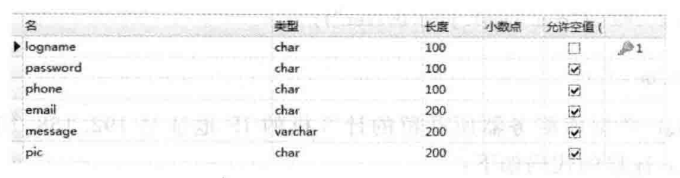

如果没有合适的MysoL 客户端管理工具,可以启动Mysql 监视器,然后在监视器占用的命令行窗口输入创建数据库MakeFriend SQL 语句(如图所示):

create database MakeFriend;

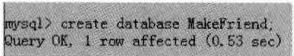

进入数据库(如图所示):
use MakeFriend;

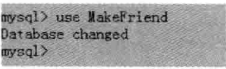

然后输入创建member 的SQL 语句(如图所示):

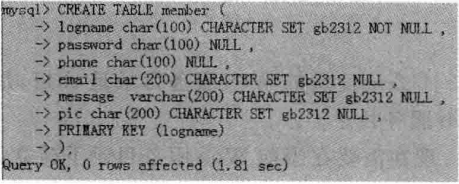

2. 连接数据库

必须保证项目使用的 MysQL 数据库服务器已经启动。将连接 MySQL 数据库的JDBC数据库驱动程序(可以登录MySQL 官方网站 www. mysql.com,下载JDBC-
MysQL据库驱动程序),比如 mysql-connector-java-5.1.28-bin.jar,复制到Tomcat 务器所使用的DK 扩展目录中(比如,D:dk1.7\jrel liblext),或复制
到Tomcat 务器安装目录的\ common\lib 文件夹中(比如,D:\apache-tomcat-8.0.3\common\lib)。

应用程序加载MysQLJDBC 据库驱动程序代码如下:
```
try{ Class. forName("com. mysql.jdbc. Driver");
catch( Exception e){}
```
假设MysQL 数据库服务器所驻留的计算机的IP 地址是192.168.100.1,与数据库 MakeFriend 建立连接的代码如下:
```
try{ String uri = "jdbc: mysql://192.168.100.1:3306/makefriend";
    String user = "root";
    String password = "";
    con = DriverManager.getConnection(uri,user,password);
    }
catch(SQLException e){
    System.out.println(e);
   }

```
其中root 用户有权访问数据库warehouse, root 用户的密码是空(没有密码)。

# 系统管理

本系统使用的Web务目录是 chll,是在Tomcat 安装目录的 webapps 录下建立的Web服务目录。

现在需要在当前Web服务目录下建立如下的目录结构:

ch11\WEB-INF\classes

为了让Tomcat 服务器起用上述目录,必须重新启动Tomcat 服务器。然后,根据servlet的包名,在 classes 下再建立相应的子目录,比如Servlet 的包名为 myservlet.control,那么在 classes 建立子目录\myservlet\control;如果Javabean 的包名为mybean.data,那么在 classes F建立子目录\mybean\data。

## 页面管理


本系统用的JSP面全部保存在Web务目录chll中。所有的页面将包括一个导航条,该导航条由会员注册、会员登录、上传照片、浏览会员、修改密码、修改注册信息、退出登录和返回主页组成。为了便于维护,其他页面通过使用 `JSP<%@include。。。%>` 标记将导航条文件 head.txt 嵌入到自己的页面中。head.txt
保存在Web 务目录chll中, head.txt 的内容如下:

head.txt

主页index.jsp 由导航条、一个欢迎语和一幅图片welcome.jpg 构成, welcome.jpg 保存在chll的子目录image 。

用户可以通过在浏览器的地址栏中输入`http://服务器IP:8080/index.jsp` 或 `http://服务器IP:8080/`访问该主页,主页运行效果如图所示。

index.jsp(效果如图所示)

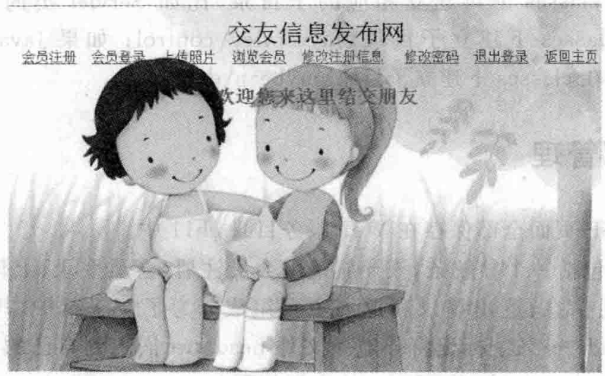

## 图像管理

本系统用到的图片所对应的图像文件,比如化妆品图片用的图像文件等,均保存在Web 服务目录chll 子目录image 。

## Javabean 与 servlet 管理

本系统的Javabean 的包名均为 mybean.data;Servlet 类的包名均为 myservlet.control.由于 Servlet 类中要使用 Javabean,所以为了能顺利地编译Servlet类,不要忘记将Tomcat装目录 lib 目录中的servlet-api.jar 文件复制到 Tomcat 服务器所使用的JdK 扩展目录中,比如,复制到D:dk1.7\jre\liblext 。

为了调试程序方便,凡是涉及Javabean 和 Servlet ,就将Javabean 文件和Servlet源文件分别保存到Web服务目录的下述目录中:
```
WEB-INE\classes\mybean\data
WEB-INF\classes\myservlet\control
```
然后进入包名的父目录classes, 如下格式分别编译 Javabean Servlet 源文件:
```
classes>javac mybean\data\Javabean 源文件
classes>javac myservlet\control\servlet 源文件
```

## 配置文件

本系统的 Servlet 类的包名均为 myservlet.control,需要配置 Web 服务目录的 web.xml 文件。根据本书使用的Tomcat 安装目录及使用的Web服务目录,将下面的web.xml 文件保存到Tomcat 服务器安装目录的\webapps\chll\WEB-INF ,比如\webapps\ch11\WEB-INF 录中。

web.xml

# 会员注册

当新会员注册时,该模块要求用户必须输入会员名、密码信息,否则不允许注册。用户的注册信息被存入数据库的member 中。

该模块的模型Javabean 述用户的注册信息;该模块的视图部分由两个JSP 面构成,一个Jsp面负责提交用户的注册信息到控制器,另一个IsP面负责显示注册是否
成功的信息;该模块的控制器servlet责将视图提交的信息写入数据库的member 表中,并负责更新视图。

## 模型(Javabean)

下列Javabean 用来描述用户注册信息。

Register.java

## 控制器(servlet)

控制器 servlet 对象的名字是 register(见web.xml 配置文件)。控制器register负责连接数据库,将用户提交的信息写入到member 表,并将用户转发到
showRegisterMess.jsp 面查看注册反馈信息。

HandleRegister.java

## 视图(JSP页面)

本模块的视图有register.jsp 和 showRegisterMess.jsp 两个JSP 页面。register.jsp 页面负责提供输入注册信息界面(如图所示); showRegisterMess.jsp(如图11.7所示)
负责显示注册反馈信息,比如注册是否成功等。

register.jsp(效果如图所示)

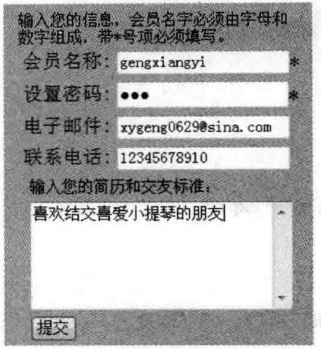

showRegisterMess.jsp

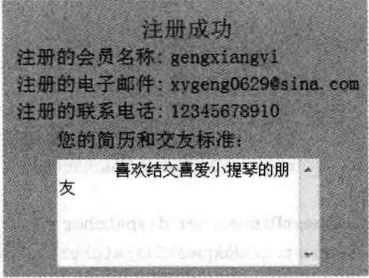

# 会员登录

用户可在该模块输入自己的会员名和密码,系统将对会员名和密码进行验证。如果输入的用户名或密码有误,将提示用户输入的用户名或密码不正确。

该模块的模型Javabean 述用户登录的信息;该模块的视图部分由两个JSP 面构成,一个isP面负责提交用户的登录信息到控制器,另一个isp面负责显示登录是否
成功的信息;该模块的控制器servletf责验证会员名和密码是否正确,并负责更新视图。

## 模型(Javabean)

下列Javabean 的实例用来描述用户登录信息。

Login.java

## 控制器(servlet)

该servlet 对象的名字是 login(见 web.xml 配置文件)。控制器login 负责连接数据库,查询member 表,验证用户输入的会员名和密码是否在member 中,并将用户转发到showLoginMess.jsp 面查看登录反馈信息。

HandleLogin.java

## 视图(JSP页面)

本模块的视图有两个JSP 面: login.jsp(效果如图所示)和 showLoginMess.jsp(效果如图所示)。login.jsp 页面负责提供输入登录信息的界面;showLoginMess.jsp负责显示登录反馈信息,比如登录是否成功等。

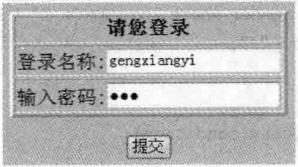

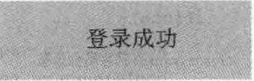

login.jsp 

showLoginMess.jsp

# 上传照片

用户可在该模块上传自己的图像。如果member 已经存有一幅图像,新上传的图像将替换原有的图像。用户在注册时,注册模块给会员的照片是默认的一幅图像public.jpg 该模块的模型Javabean 描述用户上传的图像文件的有关信息;该模块的视图部分由两个JSP面构成,一个JSP面负责提交图像文件到控制器,另一个JSP面负责显示上传操作是否成功的信息;该模块的控制器负责将图像文件上传到服务器并将图像文件的名字写入数据库的member 表中,该 servlet 还负责更新视图,使用户能看到上传操作的结果。另外,控制器能阻止未登录用户上传图像。

## 模型(Javabean)

下面的 Javabean 实例用来描述上传文件的有关信息。

UploadFile.java

## 控制器(servlet)

该servlet 对象的名字是 upload(见web.xml 配置文件)。upload 控制器负责检查用户是否是登录用户,如果用户没有登录, upload 制器将把用户定向到登录页面login.jsp;对于登录的用户,upload 制器负责把用户提交的图像文件保存到当前 Web 服务目录的特定子目录image 中。

服务器保存上传的图像文件名字是用户的会员名。upload 控制器同时负责将保存的图像文件名存入member 表,然后将用户转发至 showUploadMess.jsp 页面查看上传操作的反馈信息。

HandleUpload.java

## 视图(JSP页面)

本模块的视图有两个JSP 页面:upload.jsp(效果如图所示)和 showUploadMess.jsp(效果如图所示)。upload.jsp页面负责提供上传文件的单;showUploadMess.jsp负责显示上传文件的反馈信息。

upload.jsp(效果如图所示)

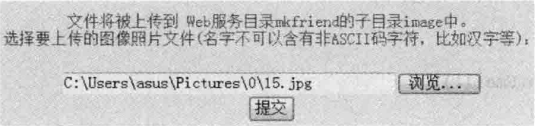

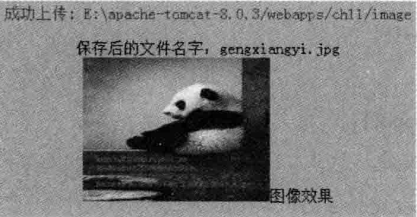

# 浏览会员信息

该模块负责分页显示注册会员的信息,包括会员名、交友条件、会员照片等,同时提供查找功能,即用户可以查找某个会员的信息。

该模块的模型Javabean 用来描述会员信息。该模块的视图部分由三个JSP 面构成。一个JSP页面负责提交用户浏览会员信息的方式—分页浏览全部会员信息或浏览特定会员信息;另外两个JSP页面分别负责分页显示全体会员信息和显示特定会员信息;该模块的控制器servlet 使用doPost 方法查询数据库member 标中的全部记录,并对记录进行分页处理,使用doGet 方法查询数据库member 表中特定的记录。另外,控制器能阻止未登录用户浏览和查询会员信息。

## 模型(Javabean)

模型有两个Javabean,其源文件分别是 MemberInform.java 和 ShowByPage.java.MemberInform.java 描述会员信息, ShowByPage.java 述记录的分页信息。

MemberInform.java

ShowByPage.java

## 控制器(servlet)

该模块的控制器的名字是lookRecord（见1web.xml 置文件)。lookRecord 使用doPost 方法查询数据库member 表中的全部记录,并对记录进行分页处
理,使用doGet 方法查询数据库 member 表中特定的记录。另外,控制器 lookRecord 能阻止未登录用户浏览和查询会员信息。

HandleDatabase.java

## 视图(JSP页面)

本模块的视图有三个JSP 页面:choiceLookType. jsp (效果如图所示)、showAllMember. jsp(效果如图所示)和 showLookedMember.jsp效果如图
所示)。choiceLookType. isp 责将浏览会员的方式提交给控制器, showAllMember.jsp,howLookedMember.jsp 负责显示被查询到的会员信息。

choiceLookType.jsp(效果如图所示)

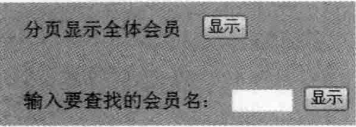

showAllMember.jsp

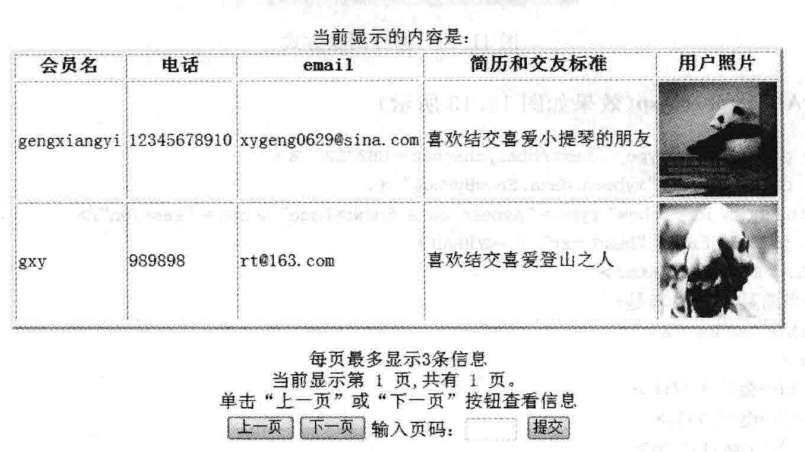

showLookedMember.jsp

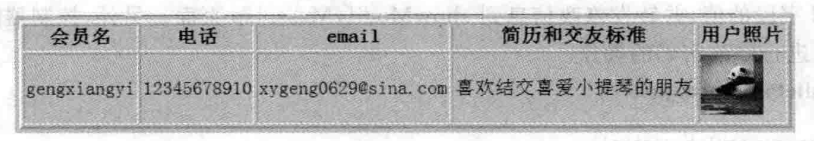

# 修改密码

登录的用户可在该模块修改密码。该模块的模型Javabean 述密码的有关信息。该模块的视图部分由两个jsp面构成,一个JSP面负责提交用户的新旧密码到控制器;另一个jsP页面负责显示修改是否成功的信息。该模块的控制器 servlet 负责修改密码。

## 模型(Javabean)

下面的Javabean Password.java 实例用来描述修改密码有关信息。

Password.java

## 控制器(servlet)

控制器负责连接数据厍,根据当前用户注册的会员名修改member 中该会员的 password 字段的值,并转发修改信息到 showModifyMess.jsp 页面。另外,控制器能阻止未
登录用户进行修改密码的操作。

HandlePassword.java

## 视图(JSP页面)

本模块的视图有两个JSP 面:modifyPassword.jsp (效果如图所示)和showNewPassword.jsp(效果如图所示)。modifyPassword.jsp 面负责提供输入密
码的界面;showNewPassword.jsp 负责显示修改密码的反馈信息。

modifyPassword.jsp(效果如图所示)

showNewPassword.jsp

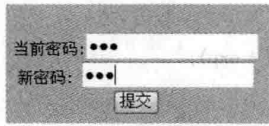

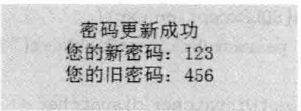

# 修改注册信息

用户可在该模块修改曾注册的个人信息。该模块的模型Javabean述用户修改的信息;该模块视图部分由两个JSP页面构成,第一个页面负责提交用户的修改信息到控制器,第二个JSP页面负责显示修改是否成功的信息。该模块的控制器负责修改曾注册的信息,并能阻止未登录用户使用该模块。

## 模型(Javabean)

下面的ModifyMessage.java 用来描述用户所做修改的信息。

ModifyMessage.java

## 控制器( servlet)

该 servlet 对象的名字是 modifyOldMess(见web.xml 配置文件)。modifyOldMess 负责连接数据库,将用户提交的新信息写入到 member表 ,并将用户转到
showModifyMess.jsp页面查看修改反馈信息。

HandleModifyMess. java

## 视图(JSP页面)

本模块的视图有两个JSP 面:inputModifyMess.jsp (效果如图所示)和showModifyMess.jsp（效果如图所示)。inputModifyMess.jsp 页面提供修改信息的
界面, showModifyMess.jsp 显示修改的反馈信息。

inputModifyMess.jsp(效果如图所示)

showModifyMess.jsp

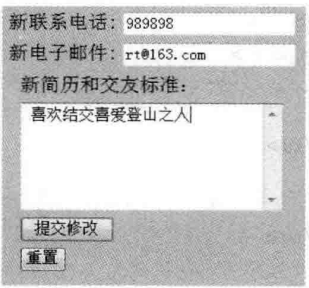

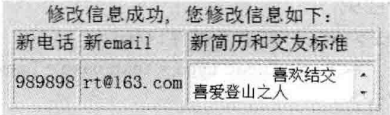

# 退出登录

该模块只有一个名字为exit 的 servlet 控制器(见web.xml 配置文件),exit 负责销毁用户的session 对象,导致登录失效。

HandleExit.java